In [1]:
%load_ext autoreload



%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os


In [2]:
import os
GPU = ''
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]= GPU

In [3]:
from frm_dataset_loader import load_dataset
from conf_dataset_1 import *


['ook', 'ask4', 'ask8', 'bpsk', 'qpsk', 'psk8', 'psk16', 'psk32', 'apsk16', 'apsk32', 'apsk64', 'qam16', 'qam32', 'qam64', 'gmsk', 'cpfsk']


In [4]:
fname = 'datasets/test_1.dat'

(comb_test,carrier_test,clean_test,fading_test,raw_test,
         freq_test,timing_offNum_test,timing_step_test,
         coeff_test,mod_test,snr_test) = load_dataset(fname,max_sps,len(mod_list))

In [5]:
mod_test_dec = np.argmax(mod_test,-1)

In [6]:
with open(f'outputs/005.pkl','rb') as f:
    res_dpn = pickle.load(f)

In [7]:
with open(f'outputs/009.pkl','rb') as f:
    res_baseline = pickle.load(f)

In [8]:
(_,_,_,dpn_mod_dec, _,_,_,_) = res_dpn['dpn']
[gru_mod_dec] = res_baseline['pred'] 

In [9]:
from frm_eval_utils import ecdf,filter_mod_snr, eval_by_snr

In [10]:

func = lambda x,y : np.mean(x==y)


mod_dpn = eval_by_snr(dpn_mod_dec,mod_test_dec,snr_test,snr_list,func)
mod_gru = eval_by_snr(gru_mod_dec,mod_test_dec,snr_test,snr_list,func)



(0.4, 1)

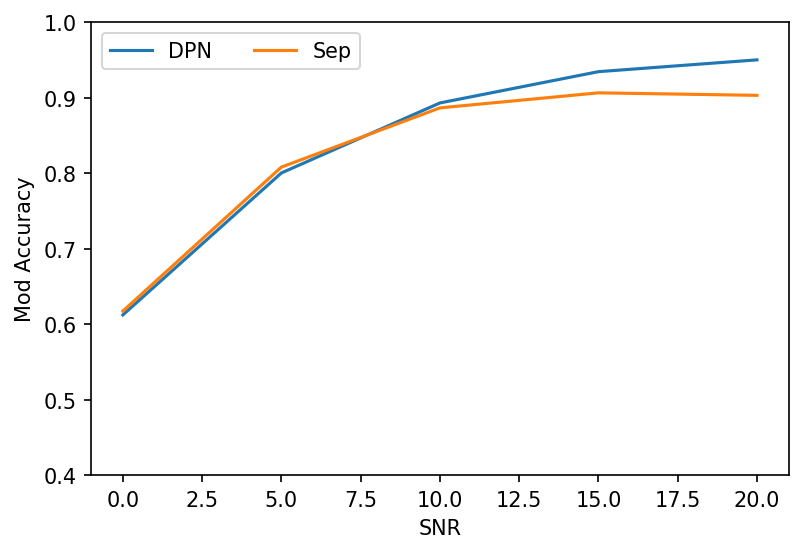

In [11]:
plt.figure(dpi=150)
plt.plot(snr_list*2,mod_dpn)
plt.plot(snr_list*2,mod_gru)

plt.xlabel('SNR')
plt.ylabel('Mod Accuracy')
plt.legend(['DPN','Sep','Unsuperv DPN','Single Path', 'GRU','ResNet','ICAMCNet','CLDNN','CNN'],ncol=2)
plt.ylim([0.4,1])